In [1]:
import pysvg.structure
import pysvg.builders
import pysvg.text
import pysvg.util
from IPython.display import SVG, display
import numpy as np

In [51]:
?pysvg.builders.ShapeBuilder.createPolygon

In [2]:
class Cube:
    def __init__(self, x0, y0, size, fill_color = "rgb(255,255,255)"):
        self.x0=x0
        self.y0=y0
        self.size=size
        self.fill_color = fill_color
        self.stroke_width = self.size/40.0
        self.stroke_color = "black"
        self.shift = self.size/4.0
        
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        svg_document.addElement(shape_builder.createRect(self.x0+self.shift, self.y0+self.shift,
                                 self.size, self.size,
                                 strokewidth = self.stroke_width,
                                 stroke = self.stroke_color,
                                 fill = self.fill_color))

        pol_points = "%d,%d %d,%d %d,%d %d,%d %d,%d %d,%d"%(self.x0+self.shift,self.y0+self.shift+self.size,
                                                            self.x0,self.y0+self.size, 
                                                            self.x0,self.y0,
                                                            self.x0+self.size,self.y0,
                                                            self.x0+self.size+self.shift,self.y0+self.shift,
                                                            self.x0+self.shift,self.y0+self.shift)
        svg_document.addElement(shape_builder.createPolygon(pol_points,
                                    strokewidth = self.stroke_width,
                                    stroke = self.stroke_color,
                                    fill = self.fill_color))


        l1 = shape_builder.createLine(self.x0,self.y0,self.x0+self.shift,
                                      self.y0+self.shift,
                                      strokewidth=self.stroke_width,
                                      stroke=self.stroke_color)
        svg_document.addElement(l1)
    
    def getJointPointLowerLeft(self, left_shift):
        return (self.x0 + self.shift/2.0 - left_shift, self.y0 + self.size + self.shift/2.0)
    
    def getJointPointLowerRight(self, right_shift):
        return (self.x0 + self.size + self.shift/2.0 + right_shift, self.y0 + self.size + self.shift/2.0)

In [3]:
class Point:
    def __init__(self, x0, y0, size, fill_color = "rgb(0,0,0)"):
        self.x0=x0
        self.y0=y0
        self.size=size
        self.fill_color = fill_color
        self.stroke_width = self.size/40.0
        self.stroke_color = "black"
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        svg_document.addElement(shape_builder.createCircle(self. x0, self.y0, self.size,
                                strokewidth = self.stroke_width,
                                stroke = self.stroke_color,
                                fill = self.fill_color))

In [4]:
class Feature:
    def __init__(self, x0, y0, size, fill_color = "rgb(0,0,0)"):
        self.x0=x0
        self.y0=y0
        self.size=size
        self.fill_color = fill_color
        self.stroke_width = 1.0
        self.stroke_color = "black"
                
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        l1 = shape_builder.createLine(self.x0,self.y0,self.x0+self.size,self.y0,
                                      strokewidth=self.stroke_width,
                                      stroke=self.stroke_color)
        svg_document.addElement(l1)
        
    def getJointPointLowerLeft(self, left_shift):
        #return (self.x0 - left_shift, self.y0)
        return (self.x0, self.y0)
    
    def getJointPointLowerRight(self, right_shift):
        #return (self.x0 +self.size + right_shift, self.y0)
        return (self.x0 +self.size, self.y0)

In [5]:
class Text:
    def __init__(self, x0, y0, text, rotation = 0, fill_color = "rgb(0,0,0)", font_size="16px", font_style='normal'):
        self.x0=x0
        self.y0=y0        
        self.fill_color = fill_color
        self.text = text
        self.rotation = rotation
        self.font_size = font_size
        self.font_style = font_style
        
    def addToDocument(self, svg_document):      
        style = pysvg.builders.StyleBuilder()
        style.setFontSize(self.font_size)
        style.setFontFamily("Arial")
        style.setFontStyle(self.font_style)
        transform = pysvg.builders.TransformBuilder()
        transform.setRotation(self.rotation)
        transform.setTranslation("%d, %d"%(self.x0,self.y0))
        text = pysvg.text.Text(self.text, x = 0, y = 0)
        text.set_style(style.getStyle())
        text.set_transform(transform.getTransform())
        #print text.getXML()
        svg_document.addElement(text)


In [6]:
class InputLayer:
    def __init__(self, x0, y0, n_cubes, cube_size, gap_x, gap_y, fill_colors = [], annotations = []):
        self.x0=x0
        self.y0=y0
        self.cube_size = cube_size
        self.n_cubes = n_cubes
        self.fill_colors = fill_colors
        self.annotations = annotations
        self.cubes = []
        self.text = []
        self.gap_x = gap_x
        self.gap_y = gap_y
        self.text_width = 15
        self.text_height = 10
        
    def constructLayer(self):
        for i in xrange(self.n_cubes):
            cb = Cube(self.x0+i*self.gap_x, self.y0+i*self.gap_y, self.cube_size)
            cb.fill_color = self.fill_colors[i]
            txt_x0, txt_y0 = cb.getJointPointLowerLeft(self.text_width)
            txt = Text(txt_x0, txt_y0 + self.text_height, self.annotations[i])
            self.text.append(txt)
            self.cubes.append(cb)
            
    def addToDocument(self, svg_document):
        for cb,txt in zip(self.cubes, self.text):
            cb.addToDocument(svg_document)
            txt.addToDocument(svg_document)

In [7]:
class FlatLayer:
    def __init__(self, x0, y0, n_features, width, gap_x, gap_y, fill_color):
        self.x0=x0
        self.y0=y0
        self.width = width
        self.n_features = n_features
        self.fill_color = fill_color
        self.stroke_color = fill_color
        self.stroke_width = 1
        self.cubes = []
        self.gap_x = gap_x
        self.gap_y = gap_y
        
    def constructLayer(self):
        for i in xrange(self.n_features):
            cb = Feature(self.x0+i*self.gap_x, self.y0+i*self.gap_y, self.width)
            self.cubes.append(cb)
            
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        pol_points = "%d,%d %d,%d %d,%d %d,%d"%(  self.x0,self.y0,
                                            self.x0+self.width,self.y0, 
                                            self.x0+self.width+(self.n_features-1)*self.gap_x,
                                            self.y0+(self.n_features-1)*self.gap_y,
                                            self.x0+(self.n_features-1)*self.gap_x,
                                            self.y0+(self.n_features-1)*self.gap_y)
        svg_document.addElement(shape_builder.createPolygon(pol_points,
                                    strokewidth = 0,
                                    stroke = self.stroke_color,
                                    fill = self.fill_color))
        
        for cb in self.cubes:
            cb.addToDocument(svg_document)
        

In [8]:
class Layer:
    def __init__(self, x0, y0, n_cubes, cube_size, gap_x, gap_y, fill_colors = ["rgb(255,255,255)", "rgb(150,150,150)"]):
        self.x0=x0
        self.y0=y0
        self.cube_size = cube_size
        self.n_cubes = n_cubes
        self.fill_colors = fill_colors
        self.cubes = []
        self.gap_x = gap_x
        self.gap_y = gap_y
        self.size_threshold = 6
        self.point_size = 2
        self.points = []
    def constructLayer(self):
        if self.n_cubes <= self.size_threshold:
            for i in xrange(self.n_cubes):
                cb = Cube(self.x0+i*self.gap_x, self.y0+i*self.gap_y, self.cube_size)
                cb.fill_color = self.fill_colors[i%len(self.fill_colors)]
                
                self.cubes.append(cb)
        else:
            for i in xrange(self.size_threshold/2):
                cb = Cube(self.x0+i*self.gap_x, self.y0+i*self.gap_y, self.cube_size)
                self.cubes.append(cb)
            
            cube_shift_x = -self.cubes[-1].shift/2.0
            cube_shift_y = -self.cubes[-1].shift/2.0
            
            points_x0 = self.x0 + self.size_threshold*self.gap_x/2 + self.cube_size + cube_shift_x
            points_y0 = self.y0 + self.size_threshold*self.gap_y/2 + self.cube_size + cube_shift_y
            
            gap_point = 5
            points_gap_x = 5*gap_point+self.cube_size
            points_gap_y = 5*gap_point+self.cube_size
            for i in range(1, 4):
                pnt = Point(points_x0+i*gap_point, points_y0+i*gap_point, self.point_size)
                self.points.append(pnt)
                
            for i in range(self.size_threshold/2, self.size_threshold):
                cb = Cube(self.x0+i*self.gap_x+points_gap_x, 
                          self.y0+i*self.gap_y+points_gap_y, self.cube_size)
                self.cubes.append(cb)
                
            for i, cb in enumerate(self.cubes):
                cb.fill_color = self.fill_colors[i%len(self.fill_colors)]
                    
    def addToDocument(self, svg_document):
        if self.n_cubes <= self.size_threshold:
            for cb in self.cubes:
                cb.addToDocument(svg_document)
        else:
            for i in xrange(self.size_threshold/2):
                self.cubes[i].addToDocument(svg_document)
            for pnt in self.points:
                pnt.addToDocument(svg_document)
            for i in range(self.size_threshold/2, self.size_threshold):
                self.cubes[i].addToDocument(svg_document)
    

In [9]:
class Arrow:
    def __init__(self, x0, y0, x1, y1, arrow_angle=15.0, arrow_length_prop=0.15):
        self.x0 = x0
        self.x1 = x1
        self.y0 = y0
        self.y1 = y1
        self.stroke_width = 2.0
        self.stroke_color = "gray"
        
        self.arrow_angle = arrow_angle
        self.arrow_length_prop = arrow_length_prop
        
        
    def addToDocument(self,svg_document):
        dist = np.sqrt( float( (self.x1-self.x0)*(self.x1-self.x0) + (self.y1-self.y0)*(self.y1-self.y0) ))
        arrow_length = 10
        angle_0 = np.arctan( (self.y1-self.y0)/float((self.x1-self.x0)))
        angle =  np.pi*self.arrow_angle/180.0
        shape_builder = pysvg.builders.ShapeBuilder()
        l1 = shape_builder.createLine(self.x0, self.y0, self.x1, self.y1, self.stroke_width, self.stroke_color)
        l1_p = shape_builder.createLine(self.x1, self.y1,
                                        self.x1-arrow_length*np.cos(angle_0-angle), 
                                        self.y1-arrow_length*np.sin(angle_0-angle), 
                                        strokewidth = self.stroke_width,
                                        stroke = self.stroke_color)
        l1_m = shape_builder.createLine(self.x1, self.y1,
                                        self.x1-arrow_length*np.cos(angle_0+angle), 
                                        self.y1-arrow_length*np.sin(angle_0+angle), 
                                        strokewidth = self.stroke_width,
                                        stroke = self.stroke_color)
        svg_document.addElement(l1)
        svg_document.addElement(l1_p)
        svg_document.addElement(l1_m)
                                    
        

In [10]:
class Connection:
    def __init__(self, layer1, layer2, connection_type="convolution", shift_l1=10, shift_l2=10, 
                 stroke_width = 0.5, stroke_color = "black"):
        self.layer1 = layer1
        self.layer2 = layer2
        self.connection_type = connection_type
        self.shift_l1 = shift_l1
        self.shift_l2 = shift_l2
        self.stroke_width = stroke_width
        self.stroke_color = stroke_color
        
    def addToDocument(self, svg_document):
        shape_builder = pysvg.builders.ShapeBuilder()
        if self.connection_type == "convolution":
            for cb_l1 in self.layer1.cubes:
                for cb_l2 in self.layer2.cubes:
                    x_l1, y_l1 = cb_l1.getJointPointLowerRight(self.shift_l1)
                    x_l2, y_l2 = cb_l2.getJointPointLowerLeft(self.shift_l2)
                    l1 = shape_builder.createLine(x_l1, y_l1, x_l2, y_l2,
                                                  strokewidth=self.stroke_width,
                                                  stroke=self.stroke_color)
                    svg_document.addElement(l1)
        if self.connection_type == "max_out":
            if len(self.layer1.cubes)!=len(self.layer2.cubes):
                print 'Max_Out: Not equal number of filters in two layers!'
            for cb_l1, cb_l2 in zip(self.layer1.cubes, self.layer2.cubes):
                x_l1, y_l1 = cb_l1.getJointPointLowerRight(self.shift_l1)
                x_l2, y_l2 = cb_l2.getJointPointLowerLeft(self.shift_l2)
                arrow = Arrow(x_l1, y_l1, x_l2, y_l2)
                arrow.addToDocument(svg_document)

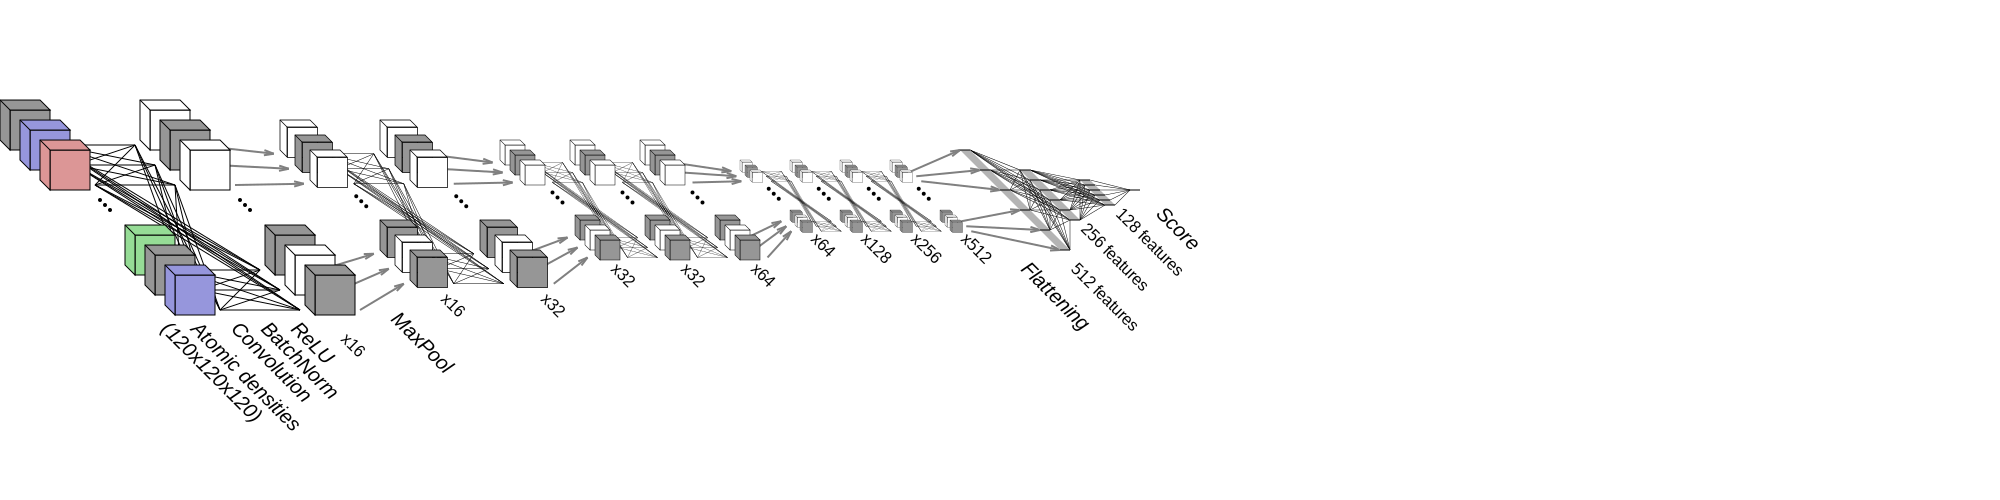

In [14]:
svg_document = pysvg.structure.Svg(height=500, width=2000)

low_text_y0 = 340
text_dx = 60
text_dy = -10
caption_font_size = "16px"
caption_font_size1 = "20px"

# li = InputLayer(10, 160, 4, 40, 20, 20,
#                fill_colors = ["rgb(150,150,150)","rgb(150,150,220)", "rgb(220,150,150)","rgb(150,220,150)"],
#                annotations = ["C","N","O","S"])
li = Layer(0, 100, 11, 40, 20, 20,
          fill_colors = ["rgb(150,150,150)","rgb(150,150,220)", "rgb(220,150,150)","rgb(150,220,150)"])
li.constructLayer()

caption = Text(100+text_dx,low_text_y0+text_dy,"(120x120x120)",rotation=45,font_size=caption_font_size1, font_style='oblique')
caption.addToDocument(svg_document)

caption = Text(130+text_dx,low_text_y0+text_dy,"Atomic densities",rotation=45,font_size=caption_font_size1, font_style='oblique')
caption.addToDocument(svg_document)

caption = Text(230+text_dx,low_text_y0+text_dy,"ReLU",rotation=45,font_size=caption_font_size1, font_style='oblique')
caption.addToDocument(svg_document)
caption = Text(200+text_dx,low_text_y0+text_dy,"BatchNorm",rotation=45,font_size=caption_font_size1, font_style='oblique')
caption.addToDocument(svg_document)
caption = Text(170+text_dx,low_text_y0+text_dy,"Convolution",rotation=45,font_size=caption_font_size1, font_style='oblique')
caption.addToDocument(svg_document)


text_dx = 60
text_dy = 0

lr1 = Layer(140, 100, 16, 40, 20, 20)
lr1.constructLayer()
caption = Text(280+text_dx,low_text_y0+text_dy,"x16",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(li,lr1,connection_type = "convolution",stroke_width = 1.0)
conv.addToDocument(svg_document)
li.addToDocument(svg_document)


text_dx = 20
text_dy = -40

lr2 = Layer(280, 120, 16, 30, 15, 15)
lr2.constructLayer()
caption = Text(420+text_dx,low_text_y0+text_dy,"x16",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr1,lr2,connection_type = "max_out")
conv.addToDocument(svg_document)
lr1.addToDocument(svg_document)

text_dx = 40
text_dy = -20
caption = Text(350+text_dx,low_text_y0+text_dy,"MaxPool",rotation=45,font_size=caption_font_size1, font_style='oblique')
caption.addToDocument(svg_document)
text_dx = 20
text_dy = -40

lr3 = Layer(380, 120, 20, 30, 15, 15)
lr3.constructLayer()
caption = Text(520+text_dx,low_text_y0+text_dy,"x32",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr2,lr3,connection_type = "convolution",stroke_width = 0.5)
conv.addToDocument(svg_document)
lr2.addToDocument(svg_document)


text_dx = -10
text_dy = -70

lr4 = Layer(500, 140, 20, 20, 10, 10)
lr4.constructLayer()
caption = Text(620+text_dx,low_text_y0+text_dy,"x32",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr3,lr4,connection_type = "max_out")
conv.addToDocument(svg_document)
lr3.addToDocument(svg_document)

lr5 = Layer(570, 140, 20, 20, 10, 10)
lr5.constructLayer()
caption = Text(690+text_dx,low_text_y0+text_dy,"x32",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr4,lr5,connection_type = "convolution",stroke_width = 0.3)
conv.addToDocument(svg_document)
lr4.addToDocument(svg_document)

lr6 = Layer(640, 140, 20, 20, 10, 10)
lr6.constructLayer()
caption = Text(760+text_dx,low_text_y0+text_dy,"x64",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr5,lr6,connection_type = "convolution",stroke_width = 0.3)
conv.addToDocument(svg_document)
lr5.addToDocument(svg_document)

text_dx = -40
text_dy = -100

lr7 = Layer(740, 160, 20, 10, 5, 5)
lr7.constructLayer()
caption = Text(850+text_dx,low_text_y0+text_dy,"x64",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr6,lr7,connection_type = "max_out")
conv.addToDocument(svg_document)
lr6.addToDocument(svg_document)

lr8 = Layer(790, 160, 20, 10, 5, 5)
lr8.constructLayer()
caption = Text(900+text_dx,low_text_y0+text_dy,"x128",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr7,lr8,connection_type = "convolution",stroke_width = 0.2)
conv.addToDocument(svg_document)
lr7.addToDocument(svg_document)

lr9 = Layer(840, 160, 20, 10, 5, 5)
lr9.constructLayer()
caption = Text(950+text_dx,low_text_y0+text_dy,"x256",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr8,lr9,connection_type = "convolution",stroke_width = 0.2)
conv.addToDocument(svg_document)
lr8.addToDocument(svg_document)


lr10 = Layer(890, 160, 20, 10, 5, 5)
lr10.constructLayer()
caption = Text(1000+text_dx,low_text_y0+text_dy,"x512",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr9,lr10,connection_type = "convolution",stroke_width = 0.2)
conv.addToDocument(svg_document)
lr9.addToDocument(svg_document)


text_dx = -10
text_dy = -70

lf1 = FlatLayer(960, 150, 6, 10, 20,20, "rgb(180,180,180)")
lf1.constructLayer()
caption = Text(1080+text_dx,low_text_y0+text_dy,"512 features",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lr10,lf1,connection_type = "max_out")
conv.addToDocument(svg_document)
lr10.addToDocument(svg_document)

caption = Text(1030+text_dx,low_text_y0+text_dy,"Flattening",rotation=45,font_size=caption_font_size1, font_style='oblique')
caption.addToDocument(svg_document)


text_dx = -50
text_dy = -110

lf2 = FlatLayer(1020, 170, 6, 10, 10,10, "rgb(180,180,180)")
lf2.constructLayer()
caption = Text(1130+text_dx,low_text_y0+text_dy,"256 features",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)

conv = Connection(lf1,lf2,connection_type = "convolution")
conv.addToDocument(svg_document)
lf1.addToDocument(svg_document)

text_dx = -65
text_dy = -125

lf3 = FlatLayer(1080, 180, 6, 10, 5, 5, "rgb(180,180,180)")
lf3.constructLayer()
caption = Text(1180+text_dx,low_text_y0+text_dy,"128 features",rotation=45,font_size=caption_font_size)
caption.addToDocument(svg_document)


conv = Connection(lf2,lf3,connection_type = "convolution")
conv.addToDocument(svg_document)
lf2.addToDocument(svg_document)

lf4 = FlatLayer(1130, 190, 1, 10, 5, 5, "rgb(180,180,180)")
lf4.constructLayer()
conv = Connection(lf3,lf4,connection_type = "convolution")
conv.addToDocument(svg_document)
lf3.addToDocument(svg_document)
lf4.addToDocument(svg_document)

caption = Text(1220+text_dx,low_text_y0+text_dy,"Score",rotation=45,font_size=caption_font_size1, font_style='oblique')
caption.addToDocument(svg_document)


svg_document.save("ConvnetDiagramV1.svg")
display(SVG("ConvnetDiagramV1.svg"))